# Data Verification Notebook

This notebook tests the complete data processing pipeline:
1. Fetch articles from Guardian API
2. Clean text (remove HTML, normalize)
3. Apply NLP preprocessing (tokenize, remove stop words, lemmatize)
4. Save both raw and processed data


In [1]:
# Install required packages if not present
import subprocess
import sys

def install_if_missing(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install packages
packages = ['requests', 'pandas', 'matplotlib', 'seaborn']
for package in packages:
    install_if_missing(package)

print("✅ All packages installed!")


✅ All packages installed!


In [2]:
# Add src to path and import functions
import sys
import os
sys.path.append('../src')
sys.path.append('..')
# Import our functions
from fetch_articles import get_articles, fetch_articles_from_api, process_articles
from text_cleaning import clean_text, preprocess_articles as clean_articles, get_text_statistics
from utils_nlp import (
    tokenize_text, remove_stop_words, lemmatize_tokens, 
    preprocess_text_pipeline, preprocess_articles_nlp, get_nlp_statistics
)

print("✅ All imports successful!")


✅ All imports successful!


## 1. Test Data Fetching


In [3]:
# Test fetching a small number of articles
print("Fetching 5 articles from Guardian API...")
articles_df = get_articles(number_of_articles=5)

print(f"✅ Successfully fetched {len(articles_df)} articles")
print(f"Columns: {list(articles_df.columns)}")
print(f"Shape: {articles_df.shape}")

# Display first article
print("\nFirst article:")
print(f"Title: {articles_df.iloc[0]['Title']}")
print(f"Section: {articles_df.iloc[0]['Section']}")
print(f"Author: {articles_df.iloc[0]['Author']}")
print(f"Content preview: {articles_df.iloc[0]['Content'][:200]}...")


Fetching 5 articles from Guardian API...
✅ Successfully fetched 5 articles
Columns: ['ID', 'Title', 'Url', 'Section', 'Published Date', 'Author', 'Content']
Shape: (5, 7)

First article:
Title: Australia news live: Suspected space debris lands in WA desert; Albanese en route to US to meet Trump
Section: Australia news
Author: Nick Visser
Content preview: 9.31pm BST Albanese en route to Washington DC after brief refuelling stop in Hawaii After a brief refuelling stop before sunrise in Honolulu, the prime minister, Anthony Albanese, continues on to Wash...


## 2. Test Text Cleaning


In [4]:
# Test text cleaning on first article
sample_content = articles_df.iloc[0]['Content']
print("Original content:")
print(sample_content[:300])
print("\n" + "="*50 + "\n")

cleaned_content = clean_text(sample_content)
print("Cleaned content:")
print(cleaned_content[:300])

print(f"\nOriginal length: {len(sample_content)}")
print(f"Cleaned length: {len(cleaned_content)}")


Original content:
9.31pm BST Albanese en route to Washington DC after brief refuelling stop in Hawaii After a brief refuelling stop before sunrise in Honolulu, the prime minister, Anthony Albanese, continues on to Washington DC for his meeting with the US president, Donald Trump. The two men will have their first for


Cleaned content:
9 31pm bst albanese en route to washington dc after brief refuelling stop in hawaii after a brief refuelling stop before sunrise in honolulu the prime minister anthony albanese continues on to washington dc for his meeting with the us president donald trump the two men will have their first formal b

Original length: 2407
Cleaned length: 2358


In [5]:
# Apply cleaning to all articles
print("Applying text cleaning to all articles...")
cleaned_df = clean_articles(articles_df)

print(f"✅ Cleaning complete!")
print(f"New columns: {[col for col in cleaned_df.columns if col not in articles_df.columns]}")

# Show statistics
stats = get_text_statistics(cleaned_df)
print(f"\nText Statistics:")
for key, value in stats.items():
    print(f"  {key}: {value}")


Applying text cleaning to all articles...
✅ Cleaning complete!
New columns: ['cleaned_text', 'text_length', 'word_count']

Text Statistics:
  total_articles: 5
  articles_with_content: 5
  average_text_length: 16742.0
  average_word_count: 3061.2
  min_text_length: 2358
  max_text_length: 30794


## 3. Test NLP Preprocessing


In [6]:
# Test NLP pipeline on cleaned text
sample_cleaned = cleaned_df.iloc[0]['cleaned_text']
print("Cleaned text:")
print(sample_cleaned[:200])
print("\n" + "="*50 + "\n")

# Test individual steps
tokens = tokenize_text(sample_cleaned)
print(f"Tokens: {tokens[:10]}... (showing first 10)")

tokens_no_stop = remove_stop_words(tokens)
print(f"Tokens without stop words: {tokens_no_stop[:10]}... (showing first 10)")

tokens_lemmatized = lemmatize_tokens(tokens_no_stop)
print(f"Lemmatized tokens: {tokens_lemmatized[:10]}... (showing first 10)")

# Test complete pipeline
processed_text = preprocess_text_pipeline(sample_cleaned)
print(f"\nFinal processed text:")
print(processed_text[:200])


Cleaned text:
9 31pm bst albanese en route to washington dc after brief refuelling stop in hawaii after a brief refuelling stop before sunrise in honolulu the prime minister anthony albanese continues on to washing


Tokens: ['9', '31pm', 'bst', 'albanese', 'en', 'route', 'to', 'washington', 'dc', 'after']... (showing first 10)
Tokens without stop words: ['9', '31pm', 'bst', 'albanese', 'en', 'route', 'washington', 'dc', 'after', 'brief']... (showing first 10)
Lemmatized tokens: ['9', '31pm', 'bst', 'albanese', 'en', 'route', 'washington', 'dc', 'aft', 'brief']... (showing first 10)

Final processed text:
9 31pm bst albanese en route washington dc aft brief refuell stop hawaii aft brief refuell stop before sunrise honolulu prime minist anthony albanese continue washington dc his meet us president donal


In [7]:
# Apply NLP preprocessing to all articles
print("Applying NLP preprocessing to all articles...")
nlp_df = preprocess_articles_nlp(cleaned_df)

print(f"✅ NLP preprocessing complete!")
print(f"New columns: {[col for col in nlp_df.columns if col not in cleaned_df.columns]}")

# Show NLP statistics
nlp_stats = get_nlp_statistics(nlp_df)
print(f"\nNLP Statistics:")
for key, value in nlp_stats.items():
    print(f"  {key}: {value}")


Applying NLP preprocessing to all articles...
✅ NLP preprocessing complete!
New columns: ['tokens', 'tokens_no_stop', 'tokens_lemmatized', 'processed_text', 'token_count', 'token_count_no_stop', 'token_count_lemmatized']

NLP Statistics:
  total_articles: 5
  average_tokens_per_article: 3061.2
  average_tokens_no_stop: 2008.0
  average_tokens_lemmatized: 2008.0
  stop_words_removed_percentage: 34.40480857180191


## 4. Complete Pipeline Test


In [8]:
# Show transformation example
print("=== TEXT TRANSFORMATION EXAMPLE ===")
print(f"Original: {articles_df.iloc[0]['Content'][:150]}...")
print(f"Cleaned:  {cleaned_df.iloc[0]['cleaned_text'][:150]}...")
print(f"NLP:      {nlp_df.iloc[0]['processed_text'][:150]}...")

print(f"\n=== FINAL DATAFRAME INFO ===")
print(f"Shape: {nlp_df.shape}")
print(f"Columns: {list(nlp_df.columns)}")
print(f"\nSample processed text:")
print(nlp_df.iloc[0]['processed_text'][:200])


=== TEXT TRANSFORMATION EXAMPLE ===
Original: 9.31pm BST Albanese en route to Washington DC after brief refuelling stop in Hawaii After a brief refuelling stop before sunrise in Honolulu, the prim...
Cleaned:  9 31pm bst albanese en route to washington dc after brief refuelling stop in hawaii after a brief refuelling stop before sunrise in honolulu the prime...
NLP:      9 31pm bst albanese en route washington dc aft brief refuell stop hawaii aft brief refuell stop before sunrise honolulu prime minist anthony albanese ...

=== FINAL DATAFRAME INFO ===
Shape: (5, 17)
Columns: ['ID', 'Title', 'Url', 'Section', 'Published Date', 'Author', 'Content', 'cleaned_text', 'text_length', 'word_count', 'tokens', 'tokens_no_stop', 'tokens_lemmatized', 'processed_text', 'token_count', 'token_count_no_stop', 'token_count_lemmatized']

Sample processed text:
9 31pm bst albanese en route washington dc aft brief refuell stop hawaii aft brief refuell stop before sunrise honolulu prime minist anthony alba

## 5. Download Larger Dataset and Save Data


In [9]:
# Download larger dataset
print("Downloading 20 articles for final dataset...")
large_df = get_articles(number_of_articles=20)

print(f"✅ Downloaded {len(large_df)} articles")

# Apply complete preprocessing pipeline
print("Applying complete preprocessing pipeline...")
cleaned_large = clean_articles(large_df)
processed_large = preprocess_articles_nlp(cleaned_large)

print(f"✅ Preprocessing complete!")
print(f"Final shape: {processed_large.shape}")
print(f"Final columns: {list(processed_large.columns)}")


✅ Downloaded 20 articles
Applying complete preprocessing pipeline...
✅ Preprocessing complete!
Final shape: (20, 17)
Final columns: ['ID', 'Title', 'Url', 'Section', 'Published Date', 'Author', 'Content', 'cleaned_text', 'text_length', 'word_count', 'tokens', 'tokens_no_stop', 'tokens_lemmatized', 'processed_text', 'token_count', 'token_count_no_stop', 'token_count_lemmatized']


In [10]:
# Save raw data
import os

raw_path = '../data/articles_raw.csv'
processed_path = '../data/articles_processed.csv'

# Save raw data (original from API)
large_df.to_csv(raw_path, index=False)
print(f"✅ Raw data saved to: {raw_path}")
print(f"   Shape: {large_df.shape}")

# Save processed data (cleaned + NLP)
processed_large.to_csv(processed_path, index=False)
print(f"✅ Processed data saved to: {processed_path}")
print(f"   Shape: {processed_large.shape}")

print(f"\n=== DATA SAVED SUCCESSFULLY ===")
print(f"Raw data: {raw_path}")
print(f"Processed data: {processed_path}")


✅ Raw data saved to: ../data/articles_raw.csv
   Shape: (20, 7)
✅ Processed data saved to: ../data/articles_processed.csv
   Shape: (20, 17)

=== DATA SAVED SUCCESSFULLY ===
Raw data: ../data/articles_raw.csv
Processed data: ../data/articles_processed.csv


## 6. Verification Summary


In [11]:
# Final verification
print("=== VERIFICATION SUMMARY ===")
print(f"✅ Data fetching: Working")
print(f"✅ Text cleaning: Working")
print(f"✅ NLP preprocessing: Working")
print(f"✅ Data saving: Working")

print(f"\n=== FINAL STATISTICS ===")
final_stats = get_nlp_statistics(processed_large)
for key, value in final_stats.items():
    print(f"  {key}: {value}")

print(f"\n=== SAMPLE PROCESSED TEXT ===")
for i in range(min(3, len(processed_large))):
    print(f"\nArticle {i+1}:")
    print(f"Title: {processed_large.iloc[i]['Title']}")
    print(f"Processed: {processed_large.iloc[i]['processed_text'][:100]}...")

print(f"\n🎉 All tests completed successfully!")
print(f"📁 Data files saved in data/ directory")
print(f"🚀 Ready for Phase 4: TextRank Summarization!")


=== VERIFICATION SUMMARY ===
✅ Data fetching: Working
✅ Text cleaning: Working
✅ NLP preprocessing: Working
✅ Data saving: Working

=== FINAL STATISTICS ===
  total_articles: 20
  average_tokens_per_article: 1668.95
  average_tokens_no_stop: 1087.05
  average_tokens_lemmatized: 1087.05
  stop_words_removed_percentage: 34.866233260433205

=== SAMPLE PROCESSED TEXT ===

Article 1:
Title: Australia news live: Suspected space debris lands in WA desert; Albanese en route to US to meet Trump
Processed: 9 31pm bst albanese en route washington dc aft brief refuell stop hawaii aft brief refuell stop befo...

Article 2:
Title: Formula One: United States Grand Prix – live updates
Processed: 9 34pm bst lap 53 56 norri lead leclerc 3 3 second verstappen sight course 8 5 second front problem ...

Article 3:
Title: NFL week seven: Eagles beat Vikings, Chiefs crush Raiders and Rams rout Jaguars – live
Processed: 9 26pm bst matthew stafford s five touchdown passe ram outstand performance day without hi

## 7. Test TextRank Summarization


In [12]:
# Import TextRank functions
from src.textrank import (
    split_into_sentence, calculate_sentence_similarity, build_sentence_graph,
    textrank_summarize, summarize_articles, get_summary_statistics
)

print("✅ TextRank imports successful!")


✅ TextRank imports successful!


In [13]:
# Test TextRank on sample text
sample_text = "Scientists have discovered a new breakthrough in artificial intelligence. The research shows promising results for machine learning applications. AI technology is advancing rapidly in various fields. The breakthrough could revolutionize how we approach complex problems. Machine learning algorithms are becoming more sophisticated and efficient."

print("=== TEXT RANK TESTING ===")
print(f"Original text: {sample_text}")
print(f"Length: {len(sample_text)} characters")

# Test sentence splitting
sentences = split_into_sentence(sample_text)
print(f"\nSentences ({len(sentences)}):")
for i, sentence in enumerate(sentences):
    print(f"  {i+1}. {sentence}")

# Test similarity calculation
if len(sentences) >= 2:
    similarity = calculate_sentence_similarity(sentences[0], sentences[1])
    print(f"\nSimilarity between first two sentences: {similarity:.3f}")

# Test graph building
graph = build_sentence_graph(sample_text)
print(f"\nGraph nodes: {graph.number_of_nodes()}")
print(f"Graph edges: {graph.number_of_edges()}")

# Test summarization
summary = textrank_summarize(sample_text, num_sentences=2)
print(f"\nSummary (2 sentences): {summary}")
print(f"Summary length: {len(summary)} characters")


=== TEXT RANK TESTING ===
Original text: Scientists have discovered a new breakthrough in artificial intelligence. The research shows promising results for machine learning applications. AI technology is advancing rapidly in various fields. The breakthrough could revolutionize how we approach complex problems. Machine learning algorithms are becoming more sophisticated and efficient.
Length: 345 characters

Sentences (5):
  1. Scientists have discovered a new breakthrough in artificial intelligence.
  2. The research shows promising results for machine learning applications.
  3. AI technology is advancing rapidly in various fields.
  4. The breakthrough could revolutionize how we approach complex problems.
  5. Machine learning algorithms are becoming more sophisticated and efficient.

Similarity between first two sentences: 0.000

Graph nodes: 5
Graph edges: 1

Summary (2 sentences): Scientists have discovered a new breakthrough in artificial intelligence. The research shows promisin

In [14]:
# Apply TextRank summarization to processed articles
print("=== APPLYING TEXT RANK TO ARTICLES ===")

# Use the processed data from earlier
if 'processed_large' in locals():
    print(f"Applying TextRank to {len(processed_large)} articles...")
    
    # Apply summarization
    summarized_df = summarize_articles(processed_large)
    
    print(f"✅ Summarization complete!")
    print(f"New columns: {[col for col in summarized_df.columns if col not in processed_large.columns]}")
    
    # Show statistics
    summary_stats = get_summary_statistics(summarized_df)
    print(f"\nSummary Statistics:")
    for key, value in summary_stats.items():
        print(f"  {key}: {value}")
    
    # Show sample summaries
    print(f"\n=== SAMPLE SUMMARIES ===")
    for i in range(min(3, len(summarized_df))):
        print(f"\nArticle {i+1}:")
        print(f"Title: {summarized_df.iloc[i]['Title']}")
        print(f"Original length: {len(summarized_df.iloc[i]['processed_text'].split())} words")
        print(f"Summary: {summarized_df.iloc[i]['summary']}")
        print(f"Summary length: {summarized_df.iloc[i]['summary_length']} words")
        print(f"Compression ratio: {summarized_df.iloc[i]['compression_ratio']:.2f}")
else:
    print("No processed data found. Please run the previous cells first.")


=== APPLYING TEXT RANK TO ARTICLES ===
Applying TextRank to 20 articles...
✅ Summarization complete!
New columns: ['summary', 'summary_length', 'compression_ratio']

Summary Statistics:
  total_articles: 20
  articles_with_summaries: 20
  avg_summary_length: 184.7
  min_summary_length: 12
  max_summary_length: 1089
  avg_compression_ratio: 0.17339630224781485
  min_compression_ratio: 0.029925187032418952
  max_compression_ratio: 1.0

=== SAMPLE SUMMARIES ===

Article 1:
Title: Australia news live: Suspected space debris lands in WA desert; Albanese en route to US to meet Trump
Original length: 270 words
Summary: Their first formal meeting will be very early tomorrow morning Australian time.
Summary length: 12 words
Compression ratio: 0.03

Article 2:
Title: Formula One: United States Grand Prix – live updates
Original length: 2063 words
Summary: Alonso is well back and may yet be challenged by Lawson, Stroll (medium), Ocon (medium) and the charging Antonelli, who clearly has a ton of p

In [15]:
summarized_df

,ID,Title,Url,Section,Published Date,Author,Content,cleaned_text,text_length,word_count,tokens,tokens_no_stop,tokens_lemmatized,processed_text,token_count,token_count_no_stop,token_count_lemmatized,summary,summary_length,compression_ratio
0,0,Australia news live: Suspected space debris la...,https://www.theguardian.com/australia-news/liv...,Australia news,2025-10-19 20:34:07,Nick Visser,9.31pm BST Albanese en route to Washington DC ...,9 31pm bst albanese en route to washington dc ...,2358,409,"[9, 31pm, bst, albanese, en, route, to, washin...","[9, 31pm, bst, albanese, en, route, washington...","[9, 31pm, bst, albanese, en, route, washington...",9 31pm bst albanese en route washington dc aft...,409,270,270,Their first formal meeting will be very early ...,12,0.029925
1,1,Formula One: United States Grand Prix – live u...,https://www.theguardian.com/sport/live/2025/oc...,Sport,2025-10-19 20:34:02,Beau Dure,9.34pm BST Lap 53/56: The Norris lead over Lec...,9 34pm bst lap 53 56 the norris lead over lecl...,16388,3107,"[9, 34pm, bst, lap, 53, 56, the, norris, lead,...","[9, 34pm, bst, lap, 53, 56, norris, lead, lecl...","[9, 34pm, bst, lap, 53, 56, norri, lead, lecle...",9 34pm bst lap 53 56 norri lead leclerc 3 3 se...,3107,2063,2063,Alonso is well back and may yet be challenged ...,460,0.158895
2,2,"NFL week seven: Eagles beat Vikings, Chiefs cr...",https://www.theguardian.com/sport/live/2025/oc...,Sport,2025-10-19 20:31:25,Graham Searles,9.26pm BST That is it from me then. Matthew St...,9 26pm bst that is it from me then matthew sta...,30794,6032,"[9, 26pm, bst, that, is, it, from, me, then, m...","[9, 26pm, bst, matthew, stafford, s, five, tou...","[9, 26pm, bst, matthew, stafford, s, five, tou...",9 26pm bst matthew stafford s five touchdown p...,6032,3960,3960,The third quarter remained scoreless but the R...,578,0.102994
3,3,Israel says it has resumed enforcement of ceas...,https://www.theguardian.com/world/live/2025/oc...,World news,2025-10-19 20:30:37,"Marina Dunbar (now), Morgan Ofori and Matthew ...",9.28pm BST The Council on American-Islamic Rel...,9 28pm bst the council on american islamic rel...,27232,4553,"[9, 28pm, bst, the, council, on, american, isl...","[9, 28pm, bst, council, american, islamic, rel...","[9, 28pm, bst, council, american, islamic, rel...",9 28pm bst council american islamic relation c...,4553,3020,3020,Gaza’s civil defence agency said at least 11 p...,408,0.092120
4,4,MPs urged to confront royal family over Prince...,https://www.theguardian.com/uk-news/2025/oct/1...,UK news,2025-10-19 20:28:13,"Eleni Courea, Alexandra Topping and Hannah Al-...",Parliament is under mounting pressure to exami...,parliament is under mounting pressure to exami...,6938,1205,"[parliament, is, under, mounting, pressure, to...","[parliament, mounting, pressure, examine, what...","[parliament, mount, pressure, examine, what, r...",parliament mount pressure examine what royal f...,1205,727,727,But MPs and campaigners have called for furthe...,133,0.112903
5,5,George Santos says prison sentence was ‘dispro...,https://www.theguardian.com/us-news/2025/oct/1...,US news,2025-10-19 20:23:41,Olivia Empson,Disgraced former US congressman George Santos ...,disgraced former us congressman george santos ...,3071,558,"[disgraced, former, us, congressman, george, s...","[disgraced, former, us, congressman, george, s...","[disgrac, form, us, congressman, george, santo...",disgrac form us congressman george santo said ...,558,324,324,Disgraced former US congressman George Santos ...,76,0.139450
6,6,Corrections and clarifications,https://www.theguardian.com/news/2025/oct/19/c...,News,2025-10-19 20:00:22,Corrections and clarifications column editor,"• Owing to an editing error, our obituary of t...",owing to an editing error our obituary of the ...,1112,190,"[owing, to, an, editing, error, our, obituary,...","[owing, editing, error, obituary, metallurgist...","[owing, edit, error, obituary, metallurgist, s...",owing edit error obituary met

In [ ]:
# Save the summarized data
if 'summarized_df' in locals():
    print("=== SAVING SUMMARIZED DATA ===")
    
    # Save summarized data
    summarized_path = '../data/processed/articles_summarized.csv'
    summarized_df.to_csv(summarized_path, index=False)
    
    print(f"✅ Summarized data saved to: {summarized_path}")
    print(f"   Shape: {summarized_df.shape}")
    print(f"   Columns: {list(summarized_df.columns)}")
    
    # Show final pipeline comparison
    print(f"\n=== PIPELINE COMPARISON ===")
    print(f"Raw data: {len(large_df)} articles")
    print(f"Processed data: {len(processed_large)} articles")
    print(f"Summarized data: {len(summarized_df)} articles")
    
    print(f"\n=== FINAL DATASET INFO ===")
    print(f"Total columns: {len(summarized_df.columns)}")
    print(f"Key columns: ID, Title, Section, Author, Content, cleaned_text, processed_text, summary")
    
    print(f"\n🎉 TextRank summarization complete!")
    print(f"📁 Summarized data saved in data/processed/ directory")
    print(f"🚀 Ready for Phase 5: Topic Modeling!")
else:
    print("No summarized data found. Please run the previous cells first.")


=== SAVING SUMMARIZED DATA ===
✅ Summarized data saved to: ../data/articles_summarized.csv
   Shape: (20, 20)
   Columns: ['ID', 'Title', 'Url', 'Section', 'Published Date', 'Author', 'Content', 'cleaned_text', 'text_length', 'word_count', 'tokens', 'tokens_no_stop', 'tokens_lemmatized', 'processed_text', 'token_count', 'token_count_no_stop', 'token_count_lemmatized', 'summary', 'summary_length', 'compression_ratio']

=== PIPELINE COMPARISON ===
Raw data: 20 articles
Processed data: 20 articles
Summarized data: 20 articles

=== FINAL DATASET INFO ===
Total columns: 20
Key columns: ID, Title, Section, Author, Content, cleaned_text, processed_text, summary

🎉 TextRank summarization complete!
📁 Summarized data saved in data/processed/ directory
🚀 Ready for Phase 5: Topic Modeling!


In [17]:
# Download more articles and save both raw and processed versions
print("💾 DOWNLOADING AND SAVING DATA")
print("=" * 50)

# Download larger dataset
df_large = get_articles(number_of_articles=20)
print(f"📊 Downloaded {len(df_large)} articles")

# Process the data
df_processed = clean_articles(df_large)
df_final = preprocess_articles_nlp(df_processed)

# Create data directories if they don't exist
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

# Save raw data (Phase 2 output)
raw_filename = 'data/raw/articles_raw.csv'
df_large.to_csv(raw_filename, index=False)
print(f"💾 Raw data saved to: {raw_filename}")

# Save processed data (Phase 3 output)
processed_filename = 'data/processed/articles_processed.csv'
df_final.to_csv(processed_filename, index=False)
print(f"💾 Processed data saved to: {processed_filename}")

# Show final statistics
print(f"\n📊 FINAL STATISTICS:")
print(f"Total articles: {len(df_final)}")
print(f"Articles with content: {len(df_final[df_final['cleaned_text'].str.len() > 0])}")
print(f"Average text length: {df_final['text_length'].mean():.1f}")
print(f"Average word count: {df_final['word_count'].mean():.1f}")
print(f"Average tokens: {df_final['token_count'].mean():.1f}")
print(f"Average tokens (no stop): {df_final['token_count_no_stop'].mean():.1f}")

print(f"\n✅ Data pipeline complete!")


💾 DOWNLOADING AND SAVING DATA
📊 Downloaded 20 articles
💾 Raw data saved to: data/raw/articles_raw.csv
💾 Processed data saved to: data/processed/articles_processed.csv

📊 FINAL STATISTICS:
Total articles: 20
Articles with content: 20
Average text length: 9198.6
Average word count: 1669.0
Average tokens: 1669.0
Average tokens (no stop): 1087.0

✅ Data pipeline complete!


## 8. Phase 5: Topic Modeling


In [18]:
# Import Phase 5 functions
from src.topic_modeling import (
    create_tfidf_matrix, 
    cluster_articles, 
    get_top_keywords_per_cluster,
    assign_topics_to_articles
)

print("✅ Phase 5 imports successful!")


✅ Phase 5 imports successful!


In [ ]:
# Load summarized data for topic modeling
import pandas as pd

# Load the summarized data from Phase 4
try:
    df_summarized = pd.read_csv('../data/processed/articles_summarized.csv')
    print(f"✅ Loaded summarized data: {df_summarized.shape}")
    print(f"Columns: {list(df_summarized.columns)}")
    
    # Show sample data
    print(f"\nSample articles:")
    for i in range(min(3, len(df_summarized))):
        print(f"\nArticle {i+1}:")
        print(f"Title: {df_summarized.iloc[i]['Title']}")
        print(f"Section: {df_summarized.iloc[i]['Section']}")
        print(f"Content preview: {df_summarized.iloc[i]['Content'][:100]}...")
        
except FileNotFoundError:
    print("❌ Summarized data not found. Please run Phase 4 first.")
    print("Using processed data instead...")
    df_summarized = pd.read_csv('../data/processed/articles_processed.csv')


❌ Summarized data not found. Please run Phase 4 first.
Using processed data instead...


In [20]:
# Create TF-IDF matrix for topic modeling
print("=== CREATING TF-IDF MATRIX ===")

# Use Content column for topic modeling
texts = df_summarized['Content'].tolist()
print(f"Processing {len(texts)} articles for TF-IDF...")

# Create TF-IDF matrix
tfidf_matrix, feature_names = create_tfidf_matrix(texts)

print(f"✅ TF-IDF matrix created!")
print(f"Matrix shape: {tfidf_matrix.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Sample features: {feature_names[:10]}...")

# Show matrix statistics
import numpy as np
print(f"\nMatrix statistics:")
print(f"Non-zero elements: {np.count_nonzero(tfidf_matrix)}")
print(f"Sparsity: {(1 - np.count_nonzero(tfidf_matrix) / tfidf_matrix.size) * 100:.1f}%")
print(f"Average TF-IDF score: {tfidf_matrix.mean():.4f}")
print(f"Max TF-IDF score: {tfidf_matrix.max():.4f}")


=== CREATING TF-IDF MATRIX ===
Processing 20 articles for TF-IDF...
✅ TF-IDF matrix created!
Matrix shape: (20, 1613)
Number of features: 1613
Sample features: ['0', '000', '00pm', '01pm', '02pm', '03pm', '04pm', '05pm', '06pm', '07pm']...

Matrix statistics:
Non-zero elements: 4947
Sparsity: 84.7%
Average TF-IDF score: 0.0083
Max TF-IDF score: 0.3457


In [21]:
# Test different K values for clustering
print("=== TESTING DIFFERENT K VALUES ===")

from sklearn.metrics import silhouette_score

k_values = [3, 5, 7]
silhouette_scores = []

for k in k_values:
    print(f"\nTesting K={k}...")
    
    # Cluster articles
    labels, km = cluster_articles(tfidf_matrix, clusters_count=k, random_state=42)
    
    # Calculate silhouette score
    if len(set(labels)) > 1:  # Need at least 2 clusters for silhouette
        sil_score = silhouette_score(tfidf_matrix, labels)
        silhouette_scores.append(sil_score)
        print(f"Silhouette score: {sil_score:.3f}")
    else:
        silhouette_scores.append(0)
        print(f"Silhouette score: N/A (only 1 cluster)")
    
    # Show cluster sizes
    cluster_sizes = {i: (labels == i).sum() for i in range(k)}
    print(f"Cluster sizes: {cluster_sizes}")

# Find best K
best_k_idx = np.argmax(silhouette_scores)
best_k = k_values[best_k_idx]
best_score = silhouette_scores[best_k_idx]

print(f"\n=== BEST K SELECTION ===")
print(f"Best K: {best_k}")
print(f"Best silhouette score: {best_score:.3f}")
print(f"All scores: {dict(zip(k_values, silhouette_scores))}")


=== TESTING DIFFERENT K VALUES ===

Testing K=3...
Silhouette score: 0.044
Cluster sizes: {0: np.int64(10), 1: np.int64(3), 2: np.int64(7)}

Testing K=5...
Silhouette score: 0.043
Cluster sizes: {0: np.int64(10), 1: np.int64(2), 2: np.int64(3), 3: np.int64(4), 4: np.int64(1)}

Testing K=7...
Silhouette score: 0.044
Cluster sizes: {0: np.int64(3), 1: np.int64(9), 2: np.int64(3), 3: np.int64(1), 4: np.int64(2), 5: np.int64(1), 6: np.int64(1)}

=== BEST K SELECTION ===
Best K: 7
Best silhouette score: 0.044
All scores: {3: 0.0436727962455846, 5: 0.04292430659625609, 7: 0.044396880498013935}


In [22]:
# Final clustering with best K
print(f"=== FINAL CLUSTERING WITH K={best_k} ===")

# Cluster with best K
final_labels, final_km = cluster_articles(tfidf_matrix, clusters_count=best_k, random_state=42)

print(f"✅ Clustering complete!")
print(f"Cluster distribution: {dict(zip(*np.unique(final_labels, return_counts=True)))}")

# Extract top keywords for each cluster
top_keywords = get_top_keywords_per_cluster(final_km.cluster_centers_, feature_names, top_n=10)

print(f"\n=== TOP KEYWORDS PER TOPIC ===")
for i, keywords in enumerate(top_keywords):
    print(f"\nTopic {i}:")
    print(f"Keywords: {', '.join(keywords[:5])}...")  # Show first 5 keywords
    print(f"Total keywords: {len(keywords)}")

# Assign topics to articles
df_with_topics = assign_topics_to_articles(df_summarized, final_labels)

print(f"\n✅ Topics assigned to articles!")
print(f"New column added: Topic")
print(f"Final shape: {df_with_topics.shape}")


=== FINAL CLUSTERING WITH K=7 ===
✅ Clustering complete!
Cluster distribution: {np.int32(0): np.int64(3), np.int32(1): np.int64(9), np.int32(2): np.int64(3), np.int32(3): np.int64(1), np.int32(4): np.int64(2), np.int32(5): np.int64(1), np.int32(6): np.int64(1)}

=== TOP KEYWORDS PER TOPIC ===

Topic 0:
Keywords: bst, him, away, goes...
Total keywords: 4

Topic 1:
Keywords: trump, president, his, sunday, us...
Total keywords: 10

Topic 2:
Keywords: liverpool, united, chelsea, manchester, slot...
Total keywords: 10

Topic 3:
Keywords: dance, something, sculpture, like, motion...
Total keywords: 10

Topic 4:
Keywords: england, against, smith, despite, india...
Total keywords: 10

Topic 5:
Keywords: rangers, muscat, talks, port, suffered...
Total keywords: 9

Topic 6:
Keywords: readers, anti, october, place, rutherford...
Total keywords: 8

✅ Topics assigned to articles!
New column added: Topic
Final shape: (20, 18)


In [23]:
# Show topic analysis results
print("=== TOPIC ANALYSIS RESULTS ===")

# Show articles grouped by topic
for topic_id in range(best_k):
    topic_articles = df_with_topics[df_with_topics['Topic'] == topic_id]
    print(f"\n📊 TOPIC {topic_id} ({len(topic_articles)} articles):")
    print(f"Keywords: {', '.join(top_keywords[topic_id][:8])}")
    
    print(f"Articles:")
    for idx, row in topic_articles.iterrows():
        print(f"  • {row['Title']} ({row['Section']})")
    
    # Show most common sections in this topic
    section_counts = topic_articles['Section'].value_counts()
    print(f"Common sections: {dict(section_counts.head(3))}")

print(f"\n=== TOPIC DISTRIBUTION ===")
topic_dist = df_with_topics['Topic'].value_counts().sort_index()
for topic, count in topic_dist.items():
    print(f"Topic {topic}: {count} articles ({count/len(df_with_topics)*100:.1f}%)")


=== TOPIC ANALYSIS RESULTS ===

📊 TOPIC 0 (3 articles):
Keywords: bst, him, away, goes
Articles:
  • Formula One: United States Grand Prix – live updates (Sport)
  • NFL week seven: Eagles beat Vikings, Chiefs crush Raiders and Rams rout Jaguars – live (Sport)
  • Strictly Come Dancing: week four results – as it happened (Television & radio)
Common sections: {'Sport': np.int64(2), 'Television & radio': np.int64(1)}

📊 TOPIC 1 (9 articles):
Keywords: trump, president, his, sunday, us, confirmed, police, people
Articles:
  • Australia news live: Suspected space debris lands in WA desert; Albanese en route to US to meet Trump (Australia news)
  • Israel says it has resumed enforcement of ceasefire after wave of airstrikes on Gaza – Middle East crisis live (World news)
  • MPs urged to confront royal family over Prince Andrew’s Epstein links (UK news)
  • George Santos says prison sentence was ‘disproportionate’ but ‘large slice of humble pie’  (US news)
  • Morning Mail: Israel launches a

In [24]:
# Save final results with topics
print("=== SAVING FINAL RESULTS ===")

# Save articles with topics
final_path = 'data/processed/articles_with_topics.csv'
df_with_topics.to_csv(final_path, index=False)

print(f"✅ Articles with topics saved to: {final_path}")
print(f"Final shape: {df_with_topics.shape}")
print(f"Final columns: {list(df_with_topics.columns)}")

# Create metadata for the topic modeling
import json
from datetime import datetime

metadata = {
    "timestamp": datetime.now().isoformat(),
    "phase": "Phase 5 - Topic Modeling",
    "parameters": {
        "best_k": int(best_k),
        "silhouette_score": float(best_score),
        "total_articles": len(df_with_topics),
        "total_features": len(feature_names),
        "k_values_tested": k_values,
        "silhouette_scores": [float(s) for s in silhouette_scores]
    },
    "topics": {
        f"topic_{i}": {
            "keywords": keywords[:10],  # Top 10 keywords
            "article_count": int((df_with_topics['Topic'] == i).sum())
        }
        for i, keywords in enumerate(top_keywords)
    }
}

# Save metadata
metadata_path = 'data/processed/topic_modeling_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✅ Metadata saved to: {metadata_path}")

print(f"\n🎉 PHASE 5 COMPLETE!")
print(f"📊 Topics discovered: {best_k}")
print(f"📁 Final data: {final_path}")
print(f"📋 Metadata: {metadata_path}")
print(f"🚀 Ready for Phase 6: Visualization & Streamlit!")


=== SAVING FINAL RESULTS ===
✅ Articles with topics saved to: data/processed/articles_with_topics.csv
Final shape: (20, 18)
Final columns: ['ID', 'Title', 'Url', 'Section', 'Published Date', 'Author', 'Content', 'cleaned_text', 'text_length', 'word_count', 'tokens', 'tokens_no_stop', 'tokens_lemmatized', 'processed_text', 'token_count', 'token_count_no_stop', 'token_count_lemmatized', 'Topic']
✅ Metadata saved to: data/processed/topic_modeling_metadata.json

🎉 PHASE 5 COMPLETE!
📊 Topics discovered: 7
📁 Final data: data/processed/articles_with_topics.csv
📋 Metadata: data/processed/topic_modeling_metadata.json
🚀 Ready for Phase 6: Visualization & Streamlit!


## 9. Phase 6: Visualizations


In [25]:
# Import visualization functions
from plots import (
    plot_topic_distribution,
    plot_top_keywords_per_topic, 
    plot_topic_scatter,
    plot_keywords_heatmap,
    create_wordclouds,
    plot_topic_analysis_summary,
    save_all_plots
)

print("✅ Visualization imports successful!")


✅ Visualization imports successful!


=== CREATING INDIVIDUAL VISUALIZATIONS ===
1. Creating topic distribution plot...


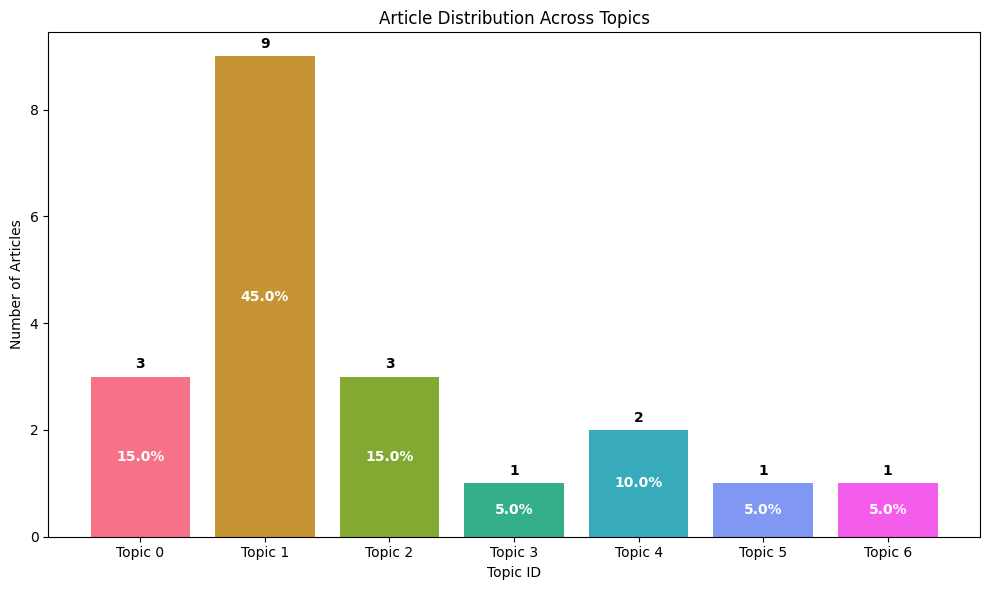

2. Creating top keywords plot...


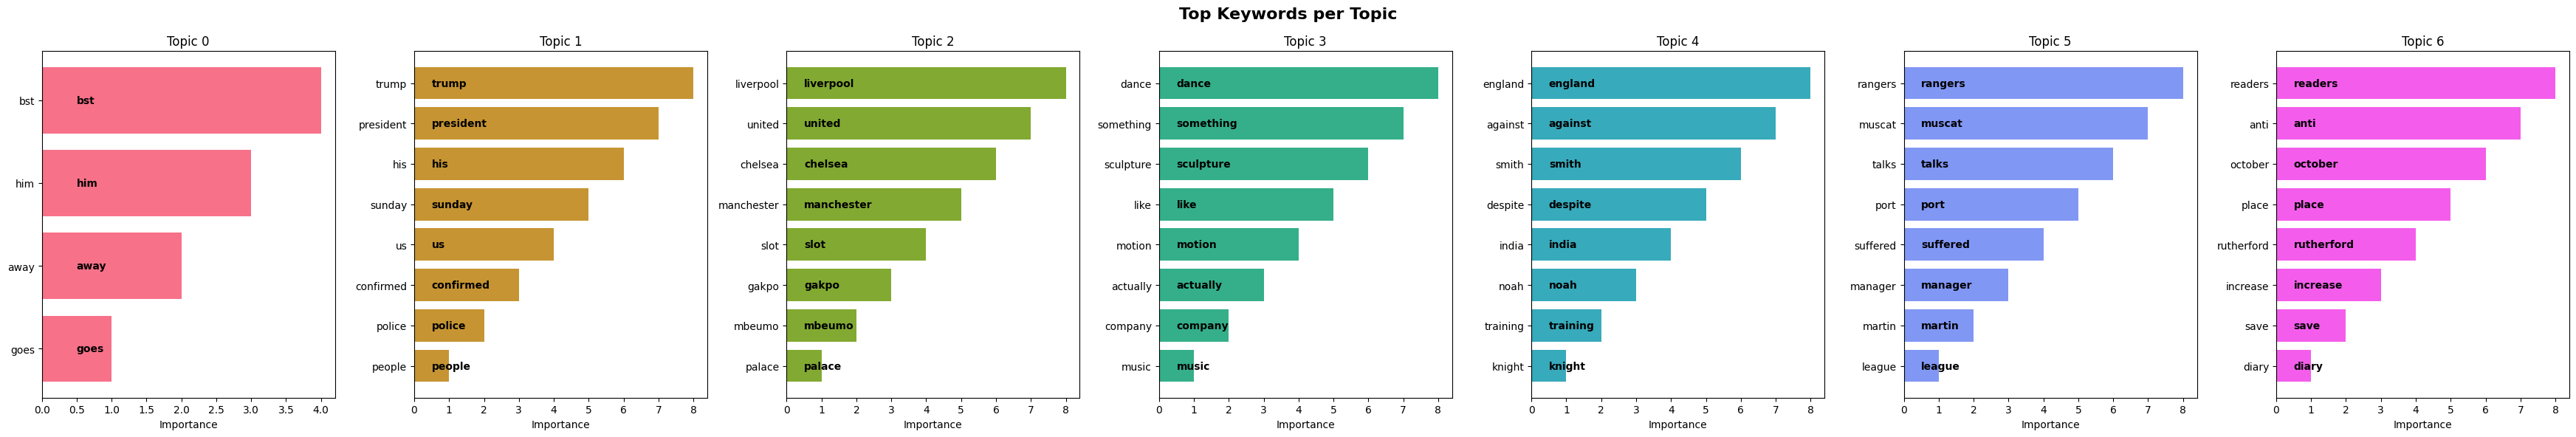

3. Creating topic scatter plot...


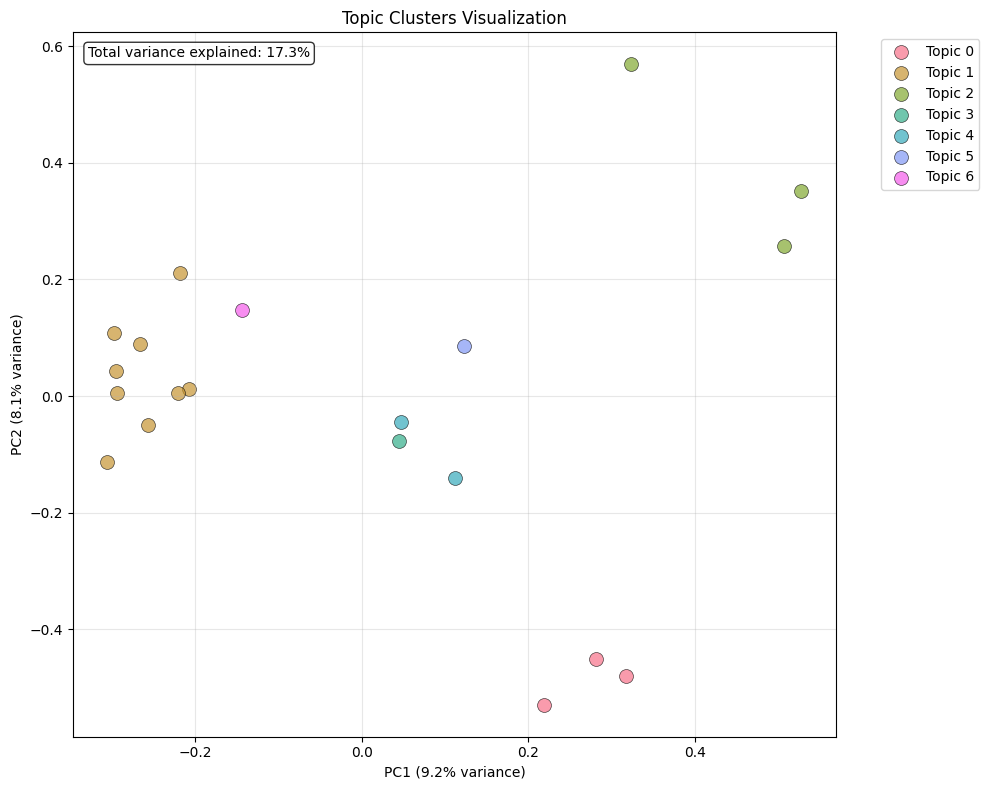

4. Creating keywords heatmap...


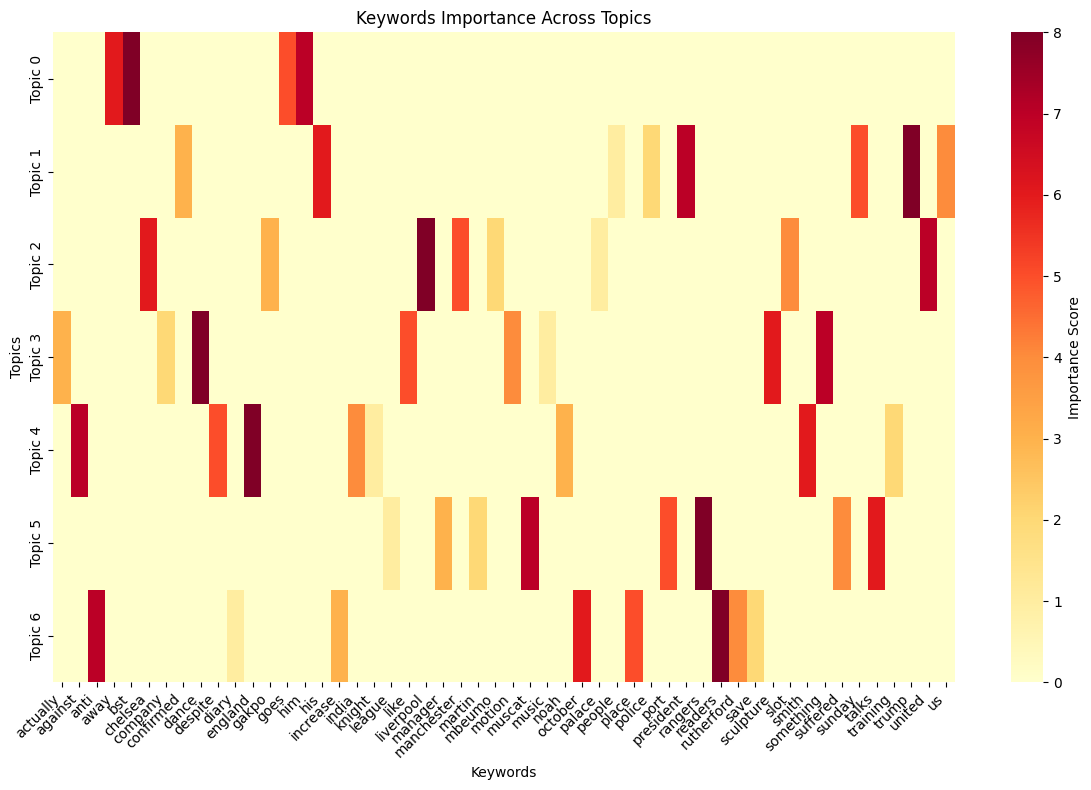

✅ All individual plots created!


In [26]:
# Test individual visualizations
print("=== CREATING INDIVIDUAL VISUALIZATIONS ===")

import matplotlib.pyplot as plt

# 1. Topic Distribution
print("1. Creating topic distribution plot...")
fig1 = plot_topic_distribution(df_with_topics, "Article Distribution Across Topics")
plt.show()

# 2. Top Keywords per Topic
print("2. Creating top keywords plot...")
fig2 = plot_top_keywords_per_topic(top_keywords, top_n=8, title="Top Keywords per Topic")
plt.show()

# 3. Topic Scatter Plot
print("3. Creating topic scatter plot...")
fig3 = plot_topic_scatter(tfidf_matrix, final_labels, feature_names, "Topic Clusters Visualization")
plt.show()

# 4. Keywords Heatmap
print("4. Creating keywords heatmap...")
fig4 = plot_keywords_heatmap(top_keywords, top_n=8, title="Keywords Importance Across Topics")
plt.show()

print("✅ All individual plots created!")


=== CREATING WORD CLOUDS ===
Word cloud for Topic 0 created


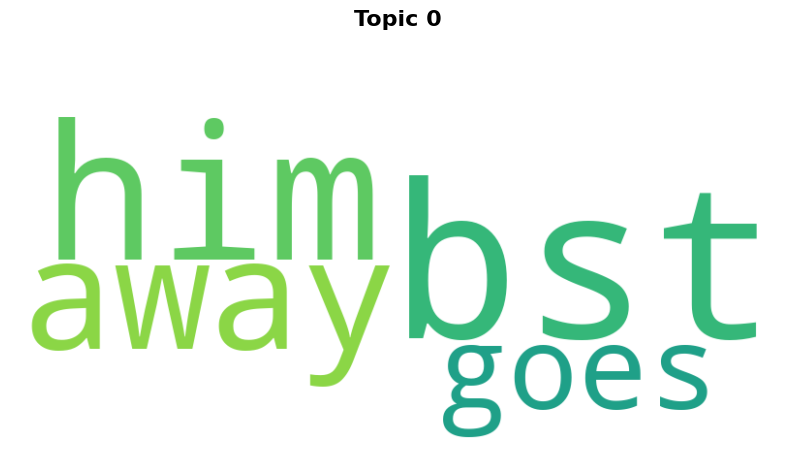

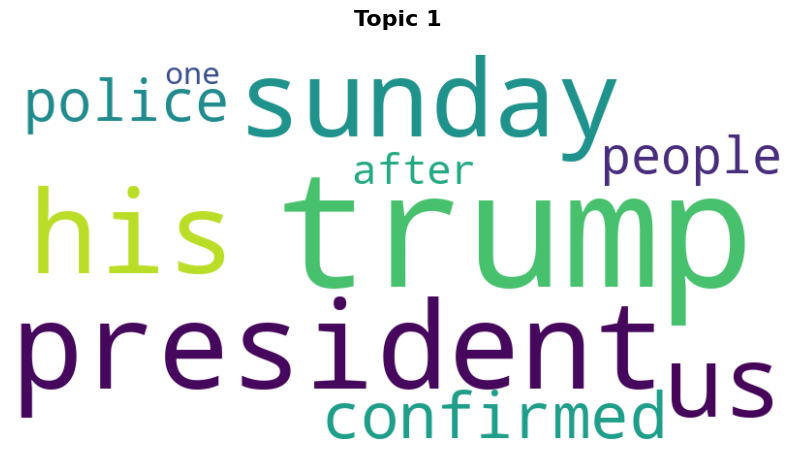

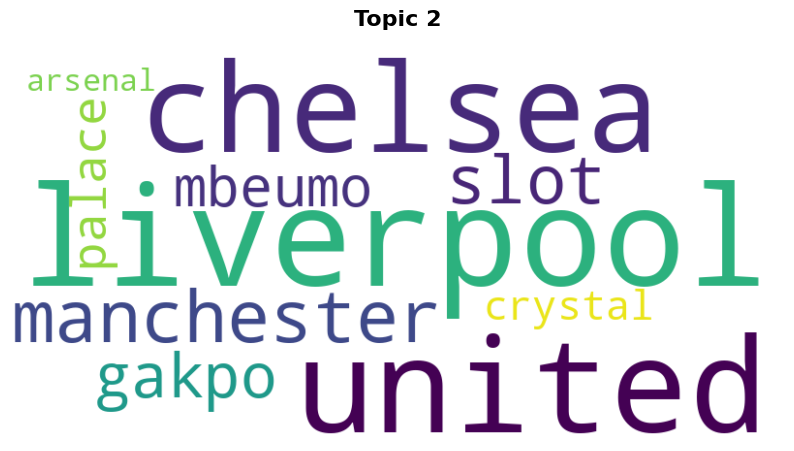

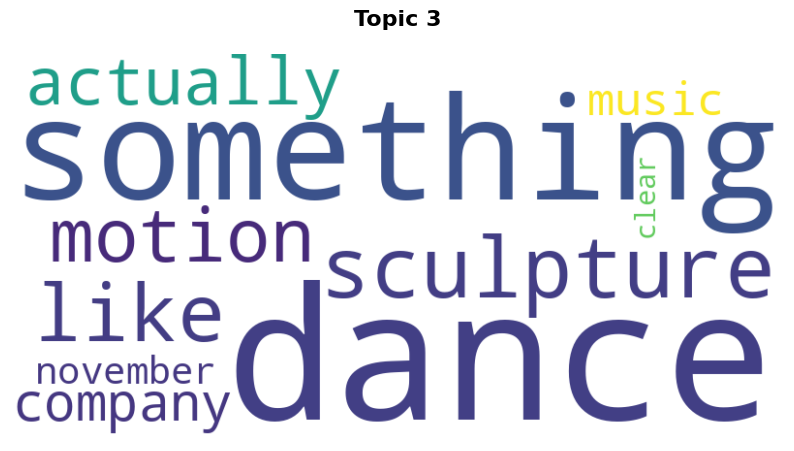

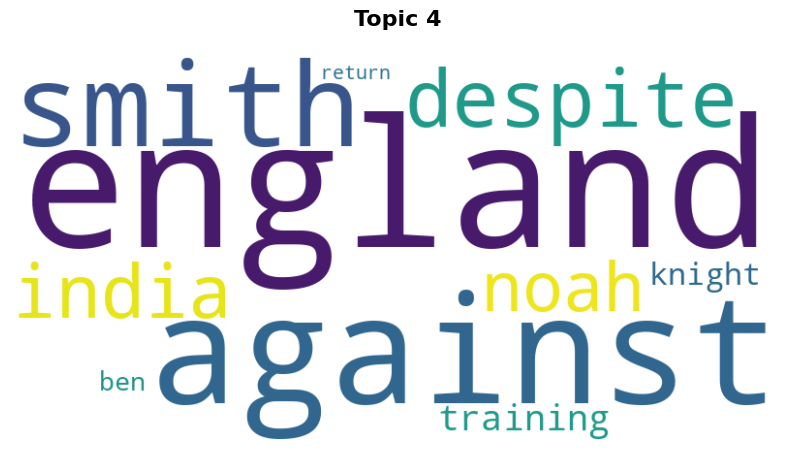

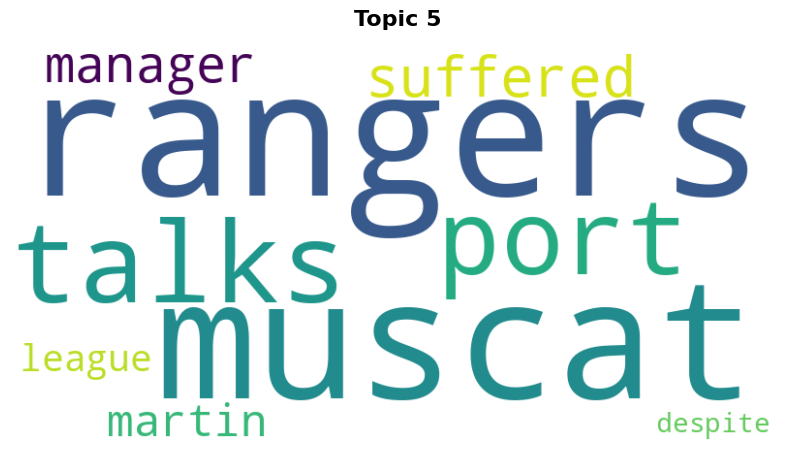

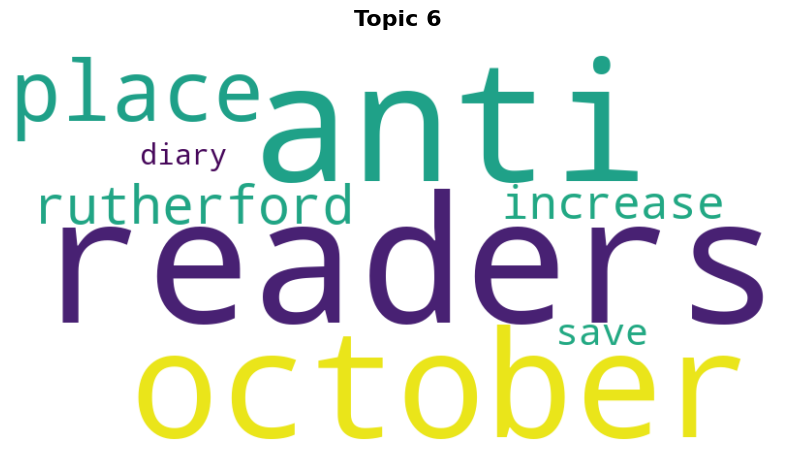

Word cloud for Topic 1 created
Word cloud for Topic 2 created
Word cloud for Topic 3 created
Word cloud for Topic 4 created
Word cloud for Topic 5 created
Word cloud for Topic 6 created
✅ All word clouds created!


In [27]:
# Create word clouds for each topic
print("=== CREATING WORD CLOUDS ===")

wordcloud_figs = create_wordclouds(top_keywords)

for i, fig in enumerate(wordcloud_figs):
    print(f"Word cloud for Topic {i} created")
    plt.show()

print("✅ All word clouds created!")


=== CREATING SUMMARY PLOT ===


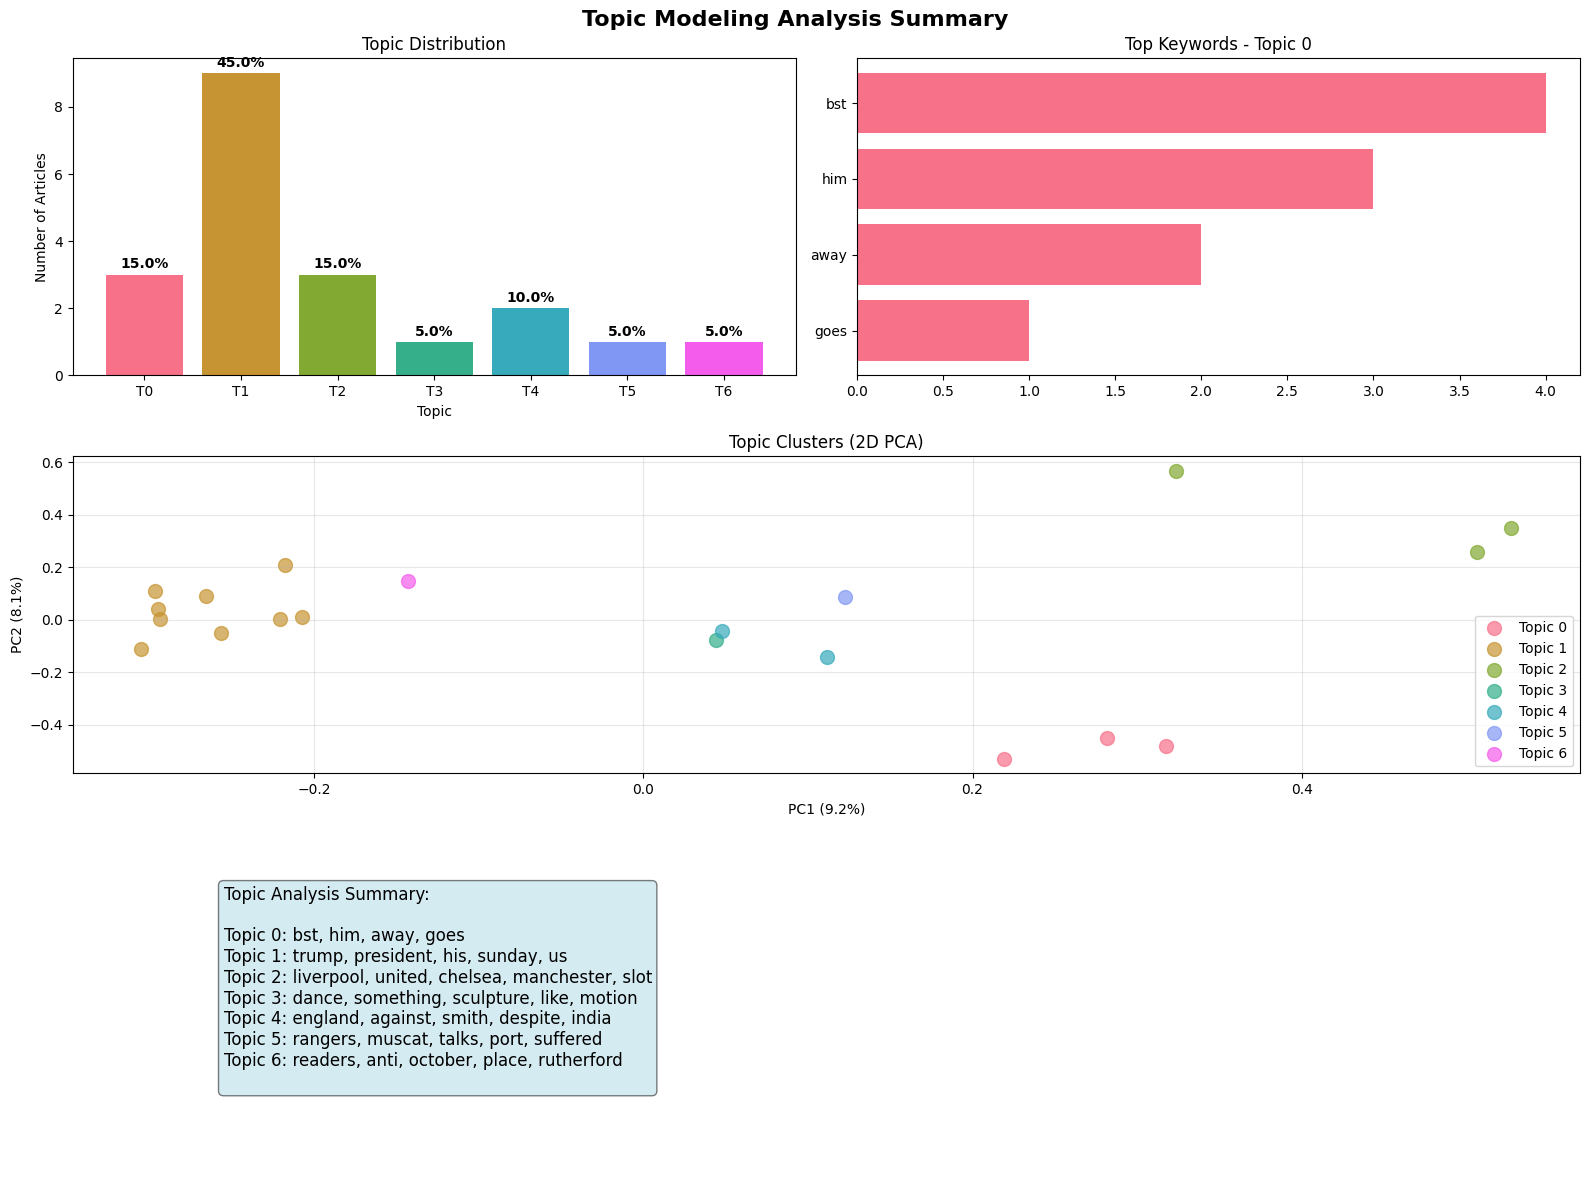

✅ Summary plot created!


In [28]:
# Create comprehensive summary plot
print("=== CREATING SUMMARY PLOT ===")

summary_fig = plot_topic_analysis_summary(
    df_with_topics, 
    top_keywords, 
    tfidf_matrix, 
    final_labels, 
    feature_names
)

plt.show()
print("✅ Summary plot created!")


In [ ]:
# Save all plots to files
print("=== SAVING ALL PLOTS ===")

saved_files = save_all_plots(
    df_with_topics,
    top_keywords,
    tfidf_matrix,
    final_labels,
    feature_names,
    output_dir='../data/processed/plots/'
)

print("✅ All plots saved!")
print("\nSaved files:")
for plot_name, file_path in saved_files.items():
    print(f"  {plot_name}: {file_path}")

print(f"\n📊 Total plots saved: {len(saved_files)}")
print(f"📁 Plots directory: ../data/processed/plots/")


=== SAVING ALL PLOTS ===
✅ All plots saved!

Saved files:
  topic_distribution: data/processed/plots/topic_distribution.png
  top_keywords: data/processed/plots/top_keywords_per_topic.png
  topic_scatter: data/processed/plots/topic_scatter.png
  keywords_heatmap: data/processed/plots/keywords_heatmap.png
  wordcloud_topic_0: data/processed/plots/wordcloud_topic_0.png
  wordcloud_topic_1: data/processed/plots/wordcloud_topic_1.png
  wordcloud_topic_2: data/processed/plots/wordcloud_topic_2.png
  wordcloud_topic_3: data/processed/plots/wordcloud_topic_3.png
  wordcloud_topic_4: data/processed/plots/wordcloud_topic_4.png
  wordcloud_topic_5: data/processed/plots/wordcloud_topic_5.png
  wordcloud_topic_6: data/processed/plots/wordcloud_topic_6.png
  summary: data/processed/plots/topic_analysis_summary.png

📊 Total plots saved: 12
📁 Plots directory: data/processed/plots/
